In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('1.04.+Real-life+example.csv')
raw_data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [3]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

In [6]:
# Predict the price of a used car depending on its specifications

In [4]:
x = raw_data[['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration', 'Year', 'Model']]
y = raw_data['Price']

In [5]:
raw_data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [6]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


Model is not that important having the other data like engine, brand and engine type

AXIS = 0 --> rows
AXIS = 1 --> columns

We will drop columns

In [7]:
data = raw_data.drop(['Model'], axis = 1)

In [8]:
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


## Dealing with missing values

In [9]:
data.isnull().sum() #finding the 0s

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

Rule of thumb: if you are removing <5% of the observations, you are free to just remove all that have Missing Values

In [10]:
data_no_mv = data.dropna(axis=0)

In [11]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


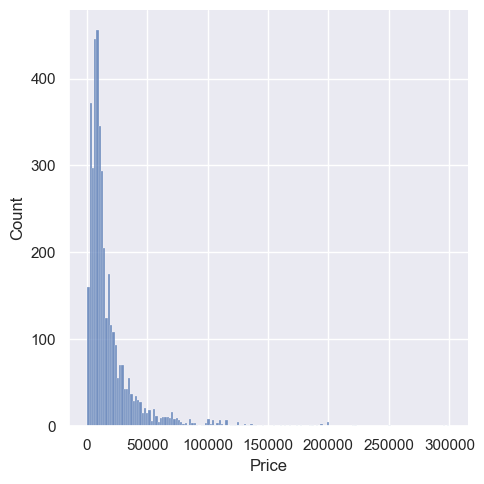

In [12]:
sns.displot(data_no_mv['Price'])

For optimal results we would be looking for a normal distribution and this is a exponential one. It is going to cause issues with the regression

**Outliers** = observations that lie on abnormal distance from other observations in the data. They will affect our regression increasing the weights because they are so far away from the mean. The solutions is to remove the outliers

#### Dealing with outliers

In [13]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


C:\Users\fxgibert\AppData\Local\Temp\ipykernel_5736\2589761964.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['Price'])


<Axes: xlabel='Price', ylabel='Density'>

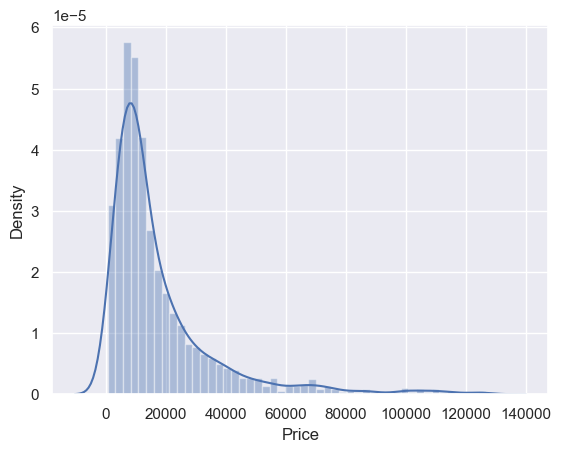

In [14]:
sns.distplot(data_1['Price'])

C:\Users\fxgibert\AppData\Local\Temp\ipykernel_5736\2495099616.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_2 = data_1[data_no_mv['Mileage']<q]
C:\Users\fxgibert\AppData\Local\Temp\ipykernel_5736\2495099616.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

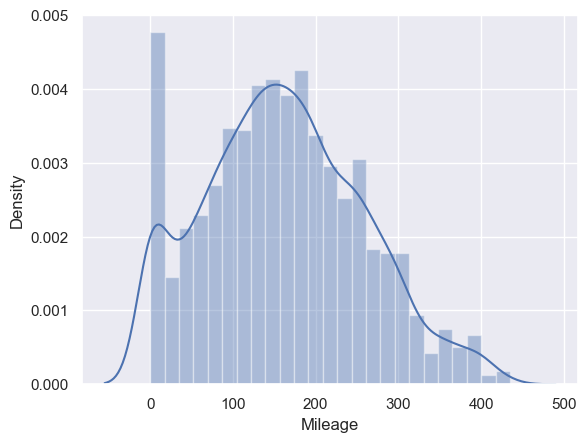

In [15]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_no_mv['Mileage']<q]
data_2.describe(include='all')
sns.distplot(data_2['Mileage'])

In [16]:
EngV = pd.DataFrame(raw_data['EngineV'])
EngV = EngV.dropna(axis = 0)
EngV.sort_values(by='EngineV')

,EngineV
2512,0.60
188,0.65
3295,1.00
2725,1.00
1923,1.00
...,...
1311,99.99
3114,99.99
1264,99.99
3641,99.99


C:\Users\fxgibert\AppData\Local\Temp\ipykernel_5736\3404246461.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

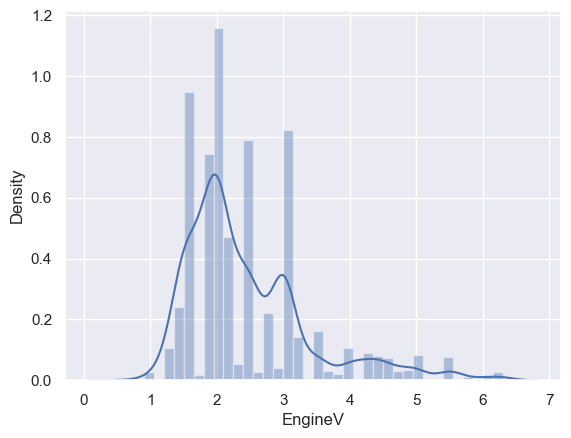

In [17]:
data_3 = data_2[data_2['EngineV']<6.5]
sns.distplot(data_3['EngineV'])

C:\Users\fxgibert\AppData\Local\Temp\ipykernel_5736\1563263984.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_4 = data_3[data_no_mv['Year']>q]
C:\Users\fxgibert\AppData\Local\Temp\ipykernel_5736\1563263984.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4['Year'])


<Axes: xlabel='Year', ylabel='Density'>

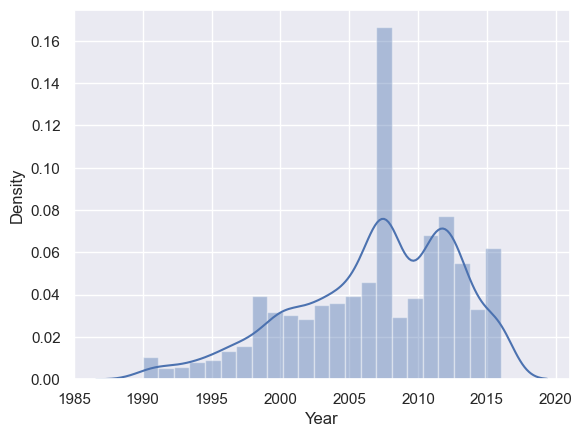

In [61]:
q = data_3['Year'].quantile(0.02)
data_4 = data_3[data_no_mv['Year']>q]
sns.distplot(data_4['Year'])

In [62]:
data_cleaned = data_4.reset_index(drop = True)

In [63]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3828,3828.00,3828,3828.00,3828.00,3828,3828,3828.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,837,NaN,1441,NaN,NaN,1799,3467,NaN
mean,NaN,18351.96,NaN,159.72,2.45,NaN,NaN,2006.90
...,...,...,...,...,...,...,...,...
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1990.00
25%,NaN,7300.00,NaN,90.75,1.80,NaN,NaN,2003.00
50%,NaN,11800.00,NaN,157.00,2.20,NaN,NaN,2008.00
75%,NaN,21900.00,NaN,224.25,3.00,NaN,NaN,2012.00


### Checking the OLS assumptions

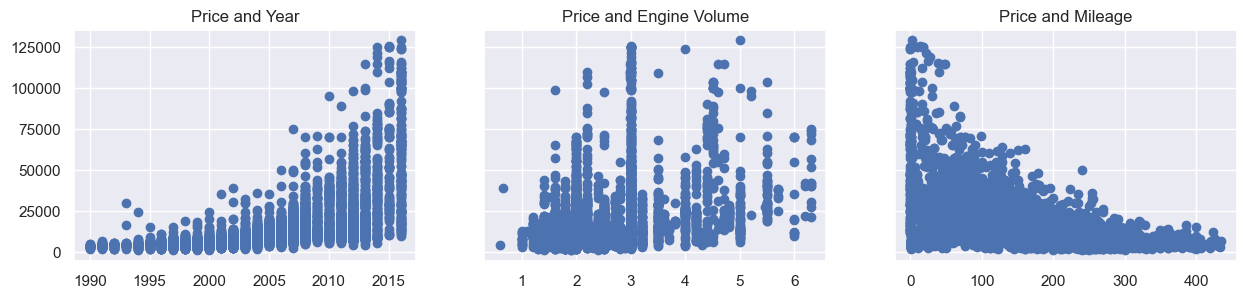

In [64]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey = True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and Engine Volume')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()
                                                  

We can identify patterns but not linear ones, so we can not apply a linear regression, we should first transform one or more variables

C:\Users\fxgibert\AppData\Local\Temp\ipykernel_5736\462586877.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['Price'])


<Axes: xlabel='Price', ylabel='Density'>

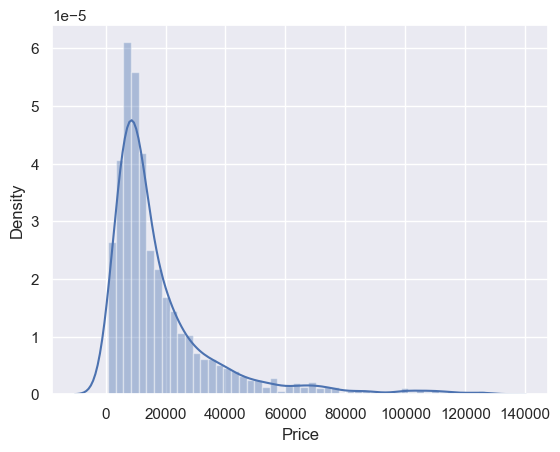

In [65]:
sns.distplot(data_cleaned['Price'])

Since the distribution of Price is not linear the relation with other variables might be not linear too

Let's take the log of Price

In [66]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,8.34
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,8.97
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,9.50
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,10.04
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,9.81
...,...,...,...,...,...,...,...,...,...
3823,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008,9.35
3824,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014,9.79
3825,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014,11.74
3826,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,8.78


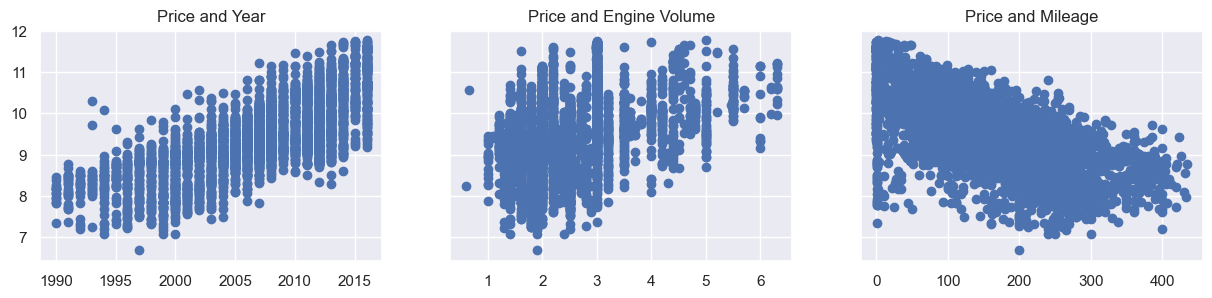

In [67]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey = True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('Price and Engine Volume')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('Price and Mileage')

plt.show()

Now we can observe a linear relation between the variables so we can drop the original price column from the dataframe.

In [68]:
data_cleaned = data_cleaned.drop(['Price'], axis = 1)

### Multicolinearity 

In [69]:
#It is logical that year and mileage is going to be correlated
#We will check the VIF variation inflation factor
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#we are checking the multicolinearity of this variables
variables = data_cleaned[['Mileage', 'Year','EngineV']] 
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [71]:
vif

,VIF,features
0,3.82,Mileage
1,10.36,Year
2,7.65,EngineV


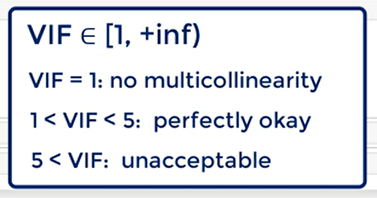

From our data, we would say that Year is too correlated to the other variables but the others are perfectly okay.

In [72]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

### Create dummy variables

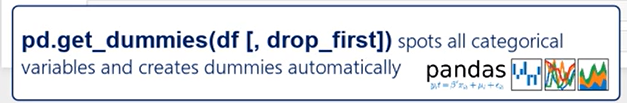

If we have N categories for a feature we have to create N-1 dummies

If we include a separate dummy variable for each category we will introduce multicollinearity to the regresison

In [73]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first = True)

In [74]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.00,8.34,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.90,8.97,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.00,9.50,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.20,10.04,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.00,9.81,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


## Rearrange a bit

In [75]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [76]:
cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [77]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.34,277,2.00,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.97,427,2.90,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.50,358,5.00,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.04,240,4.20,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.81,120,2.00,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


### Linear Regression Model

#### Declare the inputs and the targets

In [78]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

#### Scale the data

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [80]:
inputs_scaled = scaler.transform(inputs)

It is not usually recommended to standardize dummy variables. The idea is to create a custom scaler that only scales the continuous variables

#### Train Test Split

In [81]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.2, random_state=365)

#### Create the regression

In [82]:
reg = LinearRegression()

In [83]:
reg.fit(x_train,y_train) #it is a log-linear regression as the dependent variable is the log of 'Price'

LinearRegression()

A simple way to check the final result is to plot the predicted values against the observed values

In [84]:
yhat = reg.predict(x_train)

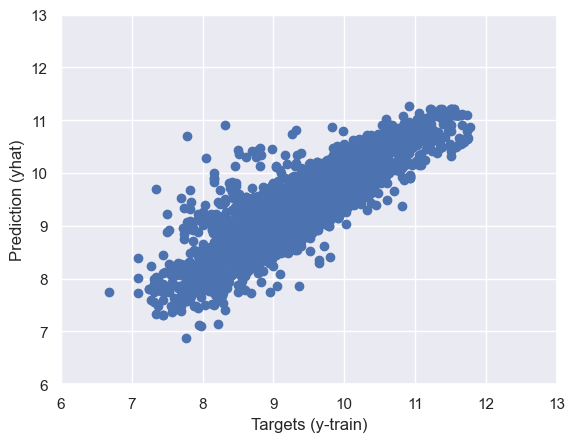

In [85]:
plt.scatter(y_train,yhat)
plt.xlabel('Targets (y-train)')
plt.ylabel('Prediction (yhat)')
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Another way to check is to use the residual plot.

Residual = Differences between the targets and the predictions

C:\Users\fxgibert\AppData\Local\Temp\ipykernel_5736\461591942.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-yhat)


Text(0.5, 1.0, 'Residuals PDF')

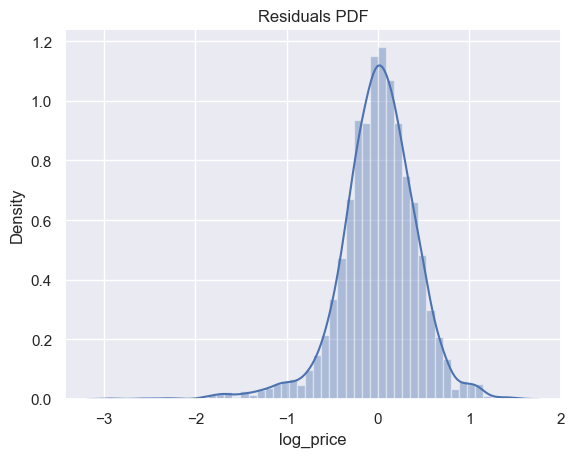

In [86]:
sns.distplot(y_train-yhat)
plt.title("Residuals PDF")

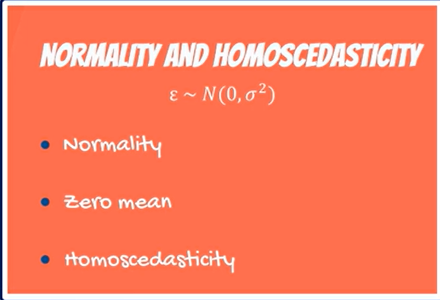

In [87]:
reg.score(x_train,y_train)

0.7619761040905886

R2 squared: Our model explains a 75% of the variability of the data

#### Find the weights and bias


In [88]:
reg.intercept_

9.43147124941618

In [89]:
reg.coef_

array([-0.45578652,  0.21376553,  0.01928887,  0.01086845, -0.1383471 ,
       -0.18172958, -0.0645657 , -0.08674468, -0.14373615, -0.09592979,
       -0.18484749, -0.11683691, -0.16060899, -0.12297488, -0.02275469,
       -0.14920888,  0.32317157])

In [90]:
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary
    

,Features,Weights
0,Mileage,-0.46
1,EngineV,0.21
2,Brand_BMW,0.02
3,Brand_Mercedes-Benz,0.01
4,Brand_Mitsubishi,-0.14
...,...,...
12,Body_van,-0.16
13,Engine Type_Gas,-0.12
14,Engine Type_Other,-0.02
15,Engine Type_Petrol,-0.15


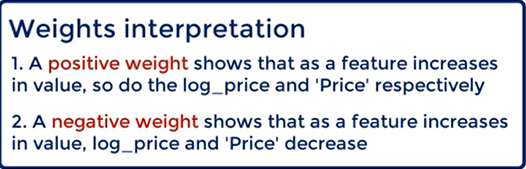

In [91]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

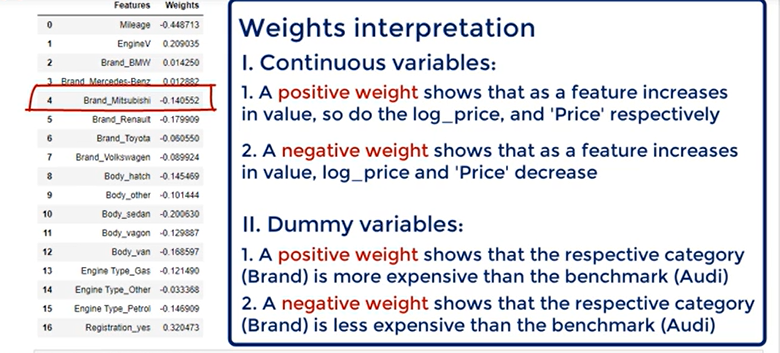

In [92]:
data_cleaned['Body'].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

The bigger the weight, the bigger the impact

It does not make sense to compare the continuous variables with the dummies.

Dummies are only compared to their respective benchmark

#### Testing

In [93]:
y_hat_test = reg.predict(x_test)

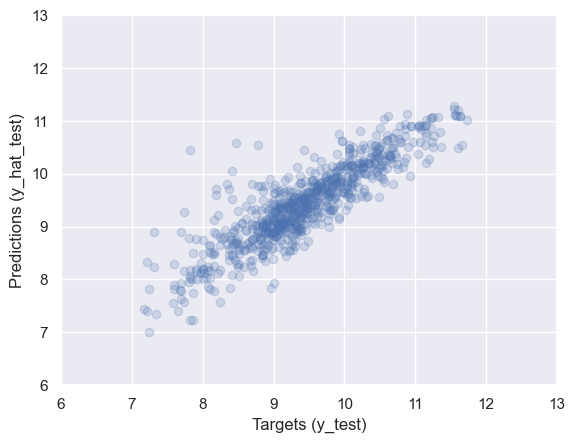

In [94]:
plt.scatter(y_test,y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)')
plt.ylabel('Predictions (y_hat_test)')
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

For higher prices, we observe that there is less variance around the 45º line which is the objective. It is very good predicting higher values. It is not good computing low prices.

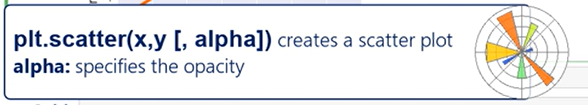

Alpha goes from 0 to 1, 1 is the default.

The more saturated the color, the higher the concentration of points

In [95]:
df_performance = pd.DataFrame(np.exp(y_hat_test), columns = ['Prediction'])
df_performance.head()
#We use the np.exp(y_hat_test) to express the prices as they should be, they were in a log scale

,Prediction
0,32764.31
1,14072.33
2,5173.63
3,13778.09
4,8862.03


In [96]:
df_performance['Target'] = np.exp(y_test)
df_performance

,Prediction,Target
0,32764.31,NaN
1,14072.33,7900.00
2,5173.63,NaN
3,13778.09,NaN
4,8862.03,NaN
...,...,...
761,56452.10,NaN
762,13350.93,6950.00
763,7297.97,NaN
764,9560.89,NaN


In [97]:
#There are a lot of missing arguments and this is due to the indexes
y_test

2487   10.11
2871   10.31
1921    8.52
2340    8.67
2068    9.13
        ... 
1700   10.85
1060    9.28
837     9.00
1746    9.46
819     9.35
Name: log_price, Length: 766, dtype: float64

When we split between train and test the original indices where preserved

So when we added y_test to df_performance, pandas tried to match those indices

We need to forget this original indexing by overwriting it

In [98]:
y_test = y_test.reset_index(drop=True)

In [99]:
df_performance['Target'] = np.exp(y_test)
df_performance

,Prediction,Target
0,32764.31,24700.00
1,14072.33,30000.00
2,5173.63,5000.00
3,13778.09,5850.00
4,8862.03,9200.00
...,...,...
761,56452.10,51500.00
762,13350.93,10700.00
763,7297.97,8100.00
764,9560.89,12900.00


In [100]:
df_performance['Residual']= df_performance['Target']-df_performance['Prediction']
df_performance

,Prediction,Target,Residual
0,32764.31,24700.00,-8064.31
1,14072.33,30000.00,15927.67
2,5173.63,5000.00,-173.63
3,13778.09,5850.00,-7928.09
4,8862.03,9200.00,337.97
...,...,...,...
761,56452.10,51500.00,-4952.10
762,13350.93,10700.00,-2650.93
763,7297.97,8100.00,802.03
764,9560.89,12900.00,3339.11


OLS (Ordinary Least Squares) the objective is minimizing SSE, which leads to lower error and better explanatory power

In [101]:
df_performance['Difference in %'] = np.absolute(100*df_performance['Residual']/df_performance['Target'])
df_performance

,Prediction,Target,Residual,Difference in %
0,32764.31,24700.00,-8064.31,32.65
1,14072.33,30000.00,15927.67,53.09
2,5173.63,5000.00,-173.63,3.47
3,13778.09,5850.00,-7928.09,135.52
4,8862.03,9200.00,337.97,3.67
...,...,...,...,...
761,56452.10,51500.00,-4952.10,9.62
762,13350.93,10700.00,-2650.93,24.78
763,7297.97,8100.00,802.03,9.90
764,9560.89,12900.00,3339.11,25.88


In [102]:
df_performance.describe()

,Prediction,Target,Residual,Difference in %
count,766.00,766.00,766.00,766.00
mean,16629.06,18313.87,1684.80,35.28
std,13435.89,18700.29,9715.26,68.85
min,1093.35,1300.00,-34601.08,0.07
25%,7673.17,7500.00,-2001.38,10.19
50%,12325.88,11800.00,259.77,21.58
75%,20713.67,22400.00,3373.77,37.96
max,79008.59,124000.00,77041.34,1272.41


In [103]:
pd.options.display.max_rows = 10
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_performance.sort_values(by=['Difference in %'])

,Prediction,Target,Residual,Difference in %
314,9706.97,9700.00,-6.97,0.07
302,12814.34,12800.00,-14.34,0.11
94,27246.21,27300.00,53.79,0.20
547,7183.36,7200.00,16.64,0.23
751,35393.93,35500.00,106.07,0.30
...,...,...,...,...
632,7248.36,1500.00,-5748.36,383.22
546,23247.28,4500.00,-18747.28,416.61
335,37931.71,6500.00,-31431.71,483.56
521,39401.08,4800.00,-34601.08,720.86


The observed prices (targets) which have more error, have an extremely low price

Their predictions are higher than the targets and maybe because we are missing and important factor which drives the price lower.

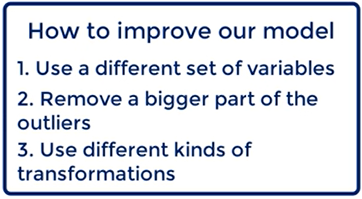